## Wing Hyun and Wei En

Hello this is Project 5!! We are analysing the data of the people who played the Beantastic card games to find out more about the changes in certain aspects of their wellbeing, as well as the relationships between the different demographic groups and how they answered certain questions. 

These are the three questions we will seek to answer in this analysis:

1. Are there significant changes in the different categories of well-being after playing Beantastic?
2. Is there a relationship in the way participants respond amongst the different categories (eg emotional intelligence vs empathy, emotional resilience and social support etc)
3. Does the demographic affect the extent of change in the different categories of well-being they have (eg emotional resilience)


In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
import geopandas as gp
import folium as fl
import scipy.stats as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf

wr.filterwarnings('ignore')

df = pd.read_csv("processed_beantastic_data.csv")

df.columns

Index(['te', 'please select your age group', 'job status', 'other',
       'over the last two weeks, i have felt cheerful and in good spirits',
       'over the last two weeks, i have felt calm and relaxed',
       'over the last two weeks, i have felt active and vigorous',
       'over the last two weeks, i woke up feeling fresh and rested',
       'over the last two weeks, my daily life has been filled with things that interest me',
       'social support_pre',
       'if you can learn anything from todayâ€™s session, what do you hope to take away? how is it important for you? what difference might it make for you?',
       'share your email!', 'start date (utc)_pre', 'submit date (utc)_pre',
       'network id_pre', 'initiative_pre', 'resilience_pre',
       'emotional stability_pre', 'empathy_pre', 'emotional intelligence_pre',
       'open-mindedness_pre', '#',
       'after the session, i feel cheerful and in good spirits',
       'after the session, i feel calm and relaxed',
   

In [110]:
df['mood_pre'] = (df['over the last two weeks, i have felt cheerful and in good spirits'] 
                  + df['over the last two weeks, i have felt calm and relaxed'] 
                  + df['over the last two weeks, i have felt active and vigorous'] 
                  + df['over the last two weeks, i woke up feeling fresh and rested'] 
                  + df['over the last two weeks, my daily life has been filled with things that interest me']) / 25 * 100
df['mood_post'] = (df['after the session, i feel cheerful and in good spirits'] 
                   + df['after the session, i feel calm and relaxed'] 
                   + df['after the session, i feel active and vigorous'] 
                   + df['after the session, i feel fresh and rested'] 
                   + df['after the session, my life has been filled with things that interest me']) / 25 * 100
df['change in mood'] = (df['mood_post'] - df['mood_pre']) / df['mood_pre'] * 100

### Question 1: Are there significant changes in the different categories of well-being after playing Beantastic?

First, we will visualise the data to see the extent of changes in the different categories of wellbeing after playing Beantastic.

In [ ]:
df2 = df[['change in initiative', 'change in resilience',
       'change in emotional stability', 'change in empathy',
       'change in emotional intelligence', 'change in open-mindedness', 
       'change in mood']]
df2.describe()

#use the scales provided by shane -- different scales may have different results
#can help project 4 with similar analyses (trang, berry, linh)

,change in initiative,change in resilience,change in emotional stability,change in empathy,change in emotional intelligence,change in open-mindedness,change in mood
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,4.832852,2.835823,6.694434,2.113490,4.201361,5.433312,35.754939
std,17.378335,11.615708,16.795941,10.315226,10.348186,18.494487,56.051785
min,-33.333333,-29.032258,-30.434783,-25.000000,-22.580645,-35.714286,-23.076923
25%,0.000000,-4.545455,-2.777778,-3.175403,0.000000,0.000000,5.263158
50%,0.000000,0.000000,5.263158,0.000000,3.225806,0.000000,20.000000
75%,14.285714,9.761905,13.809524,7.692308,8.452381,10.555556,50.000000
max,60.000000,31.250000,71.428571,34.782609,52.631579,125.000000,400.000000


<Axes: >

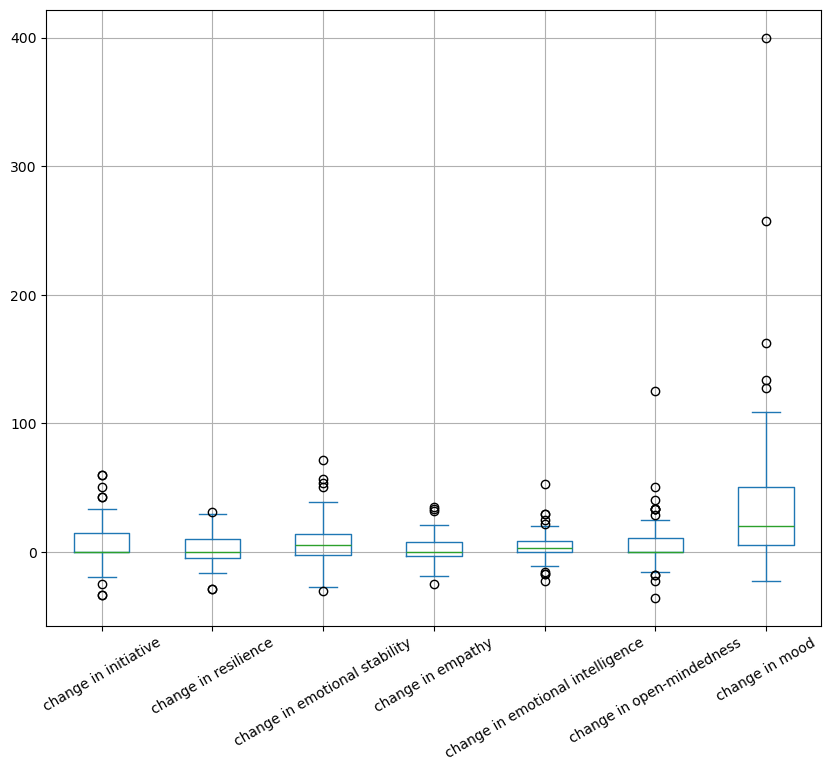

In [112]:
df2.plot.box(figsize=(10, 8), rot=30, grid=True)

From the above boxplot and summary of statistics, the greatest change would be that for mood as the median of the change in mood is largest at 20 percentage points, while initiative, resilience, empathy and open-mindedness changed the least as the median of change is 0 percentage points. 

The change in mood varied the most while the change in empathy varied the least, as visualised by the spread of data in the boxplot where the spread of the change in mood is the greatest while the change in empathy has the lowest spread.

Now, we will be performing t-tests to see whether these changes in the different categories of well-being are significant.

In [113]:
def runtest(x):
    group1 = df[x+"_pre"]
    group2 = df[x+"_post"]
    return sp.ttest_ind(group1, group2, equal_var=False)

In [114]:
runtest("initiative")

TtestResult(statistic=-1.1480756957638547, pvalue=0.2523381354803541, df=195.78776903064878)

In [115]:
runtest("resilience")

TtestResult(statistic=-0.7923105587775096, pvalue=0.4291395978573438, df=195.57882592518774)

In [116]:
runtest("emotional stability")

TtestResult(statistic=-1.9036304984464805, pvalue=0.05842694777920788, df=195.53851975738672)

In [117]:
runtest("empathy")

TtestResult(statistic=-0.959141719519839, pvalue=0.33868855060530445, df=192.8088201776519)

In [118]:
runtest("emotional intelligence")

TtestResult(statistic=-1.62481550557297, pvalue=0.10581437685643937, df=195.32643874085713)

In [119]:
runtest("open-mindedness")

TtestResult(statistic=-1.330650597554177, pvalue=0.18485764205967045, df=195.03410599696065)

In [120]:
runtest("mood")

TtestResult(statistic=-6.284718865753159, pvalue=2.0958151996585854e-09, df=195.37760670861385)

From the above t-tests for significance in the change in responses in each well-being category after playing Beantastic, there was an overall significant improvement in mood at 5% significance level. However, none of the other categories in relation to mental wellbeing were statistically significant at 5% significance level, though some categories, like emotional stability and emotional intelligence, came closer to being statistically significant as their p-values were still relatively low at about 0.0584 and 0.106 respectively. 

This implies that playing Beantastic would most likely help with regards to boosting one's emotions, and may help to a smaller extent with regards to how one recognises and handles their own emotions. However, other aspects in terms of how people treat others, such as empathy, open-mindedness, or how people respond to stresses, such as resilience and initiative, may not change significantly after playing the game.

### Question 2: Is there a relationship in the way participants respond among the different categories (eg emotional intelligence vs empathy, emotional resilience and social support etc)

Firstly, we will be doing a correlation test to see if there are any significant correlations between the different categories.

<Axes: >

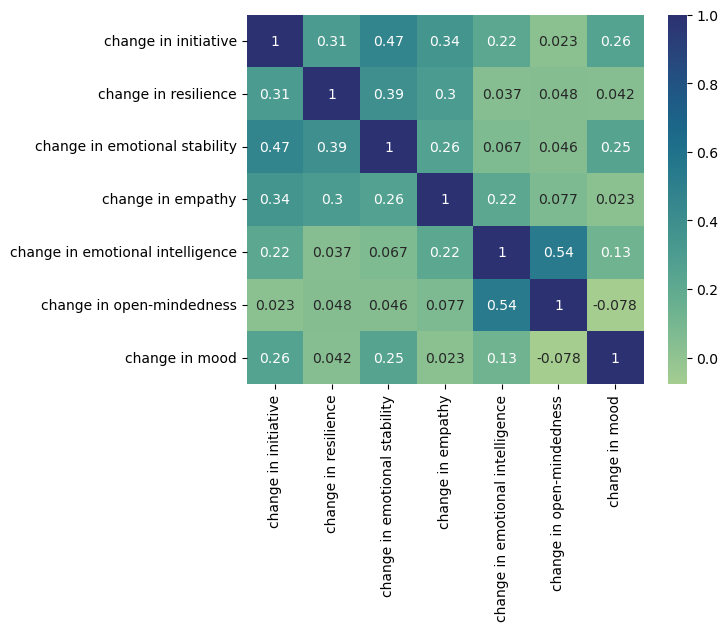

In [121]:
sns.heatmap(df2.corr(), annot=True, cmap="crest")

From the above correlation matrix, there is no strong correlation between the way that the different categories are answered. 

In [122]:
group1 = df['change in initiative']
group2 = df['change in resilience']
group3 = df['change in emotional stability'] 
group4 = df['change in empathy']
group5 = df['change in emotional intelligence'] 
group6 = df['change in open-mindedness']
group7 = df["change in mood"]

sp.bartlett(group1, group2, group3, group4, group5, group6, group7)
sp.f_oneway(group1, group2, group3, group4, group5, group6, group7)


F_onewayResult(statistic=22.478055034968673, pvalue=3.0256747566593077e-24)

### Question 3: Does the demographic affect the extent of change in the kind of mindsets they have (eg emotional resilience) (consider pre data)

In [123]:
agedf = df[["please select your age group", "change in mood"]]
agedf.columns = ["age", "change"]
agedf["age"] = agedf.age.astype("category")
agedf = pd.get_dummies(agedf, dtype=int, drop_first=True)
agedf


,change,age_2,age_3,age_4,age_5,age_6,age_7
0,72.727273,1,0,0,0,0,0
1,-5.555556,1,0,0,0,0,0
2,5.263158,1,0,0,0,0,0
3,100.000000,1,0,0,0,0,0
4,50.000000,0,0,0,1,0,0
...,...,...,...,...,...,...,...
94,11.111111,0,1,0,0,0,0
95,12.500000,1,0,0,0,0,0
96,0.000000,0,1,0,0,0,0
97,10.000000,0,1,0,0,0,0


In [124]:
model = smf.ols(formula='change ~ age_2 + age_3 + age_4 + age_5 + age_6 + age_7', data=agedf)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 change   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                 -0.028
Method:                 Least Squares   F-statistic:                    0.5592
Date:                Thu, 19 Dec 2024   Prob (F-statistic):              0.762
Time:                        14:05:58   Log-Likelihood:                -536.80
No. Observations:                  99   AIC:                             1088.
Df Residuals:                      92   BIC:                             1106.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.4318     40.181      0.608      0.5

not useful model

In [ ]:
jobdf = df[["job status", "change in mood"]]
jobdf.columns = ["job", "change"]
jobdf["job"] = jobdf.job.astype("category")
jobdf = pd.get_dummies(jobdf, dtype=int, drop_first=True)
jobdf # group broader, eg uni vs poly + ite

,change,job_2,job_3,job_4,job_6,job_7,job_8,job_10,job_12,job_13
0,72.727273,0,0,0,0,0,0,0,0,0
1,-5.555556,0,0,0,0,0,0,0,0,0
2,5.263158,0,0,0,0,0,0,0,0,0
3,100.000000,0,0,0,0,1,0,0,0,0
4,50.000000,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
94,11.111111,1,0,0,0,0,0,0,0,0
95,12.500000,1,0,0,0,0,0,0,0,0
96,0.000000,0,0,0,1,0,0,0,0,0
97,10.000000,0,0,0,1,0,0,0,0,0


In [128]:
model2 = smf.ols(formula='change ~ job_2 + job_3 + job_4 + job_6 + job_7 + job_8 + job_10 + job_12 + job_13', data=jobdf)
print(model2.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 change   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.8651
Date:                Thu, 19 Dec 2024   Prob (F-statistic):              0.559
Time:                        14:29:34   Log-Likelihood:                -534.42
No. Observations:                  99   AIC:                             1089.
Df Residuals:                      89   BIC:                             1115.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.1470     18.801      2.986      0.0

not useful model

In [ ]:
x = df["social support_pre"]
y = df["mood_pre"] #mood post?
x = sm.add_constant(x)
model3 = sm.OLS(y, x)
results = model3.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               mood_pre   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     12.74
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           0.000558
Time:                        14:05:58   Log-Likelihood:                -411.70
No. Observations:                  99   AIC:                             827.4
Df Residuals:                      97   BIC:                             832.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 25.6576      8

From the above regression model, 